# PROJECT: LOAN PREDICTION

# TABLE OF CONTENTS
0. [Introduction](#1.-Introduction)
1. [Dependencies and Libraries](#2.-Dependencies-and-Libraries)
2. [Loading the data](#3.-Loading-the-data)
3. [Basic Information of the Dataset](#4.-Basic-Information-of-the-Dataset)  
   3.1 [Quick Look of the dataset(5 first rows) and a random sample](#3.1.-Quick-Look-of-the-dataset-(5-first-rows)-and-a-random-sample)
   
   3.2 [Shape of the dataset](#3.2.-Shape-of-the-dataset) 
   
   3.3 [Information about variable datatypes](#3.3.-Information-about-variable-datatypes) 
   
   3.4 [Descriptive Statistics of the dataset](#3.4-Descriptive-Statistics-of-the-dataset)
4. [Data Cleaning](#4.-Data-Cleaning)

   4.1 [Check for Duplicates](#4.1-Check-for-Duplicates)
   
   4.2 [Check and remove Null Values](#.2-Check-and-remove-Null-Values)
5. [Visualization of the data](#5.-Visualization-of-the-data)

   5.1 [Univariate Plots](#5.1-Univariate-Plots)
   
   5.2 [Multivariate Plots](#5.2-Multivariate-Plots)
   
   5.3 [Encoding the categorical data into Quantitative data](#5.3-Encoding-the-categorical-data-into-Quantitative-data)
   

   
6. [FEATURE ENGENIERING](#6.-FEATURE-ENGENIERING)

      6.1 [Creating Dependent And Independent Variables](#6.1-Creating-Dependent-And-Independent-Variables)
     
      6.2 [Split Dataset to Train and Test](#6.2-Split-Dataset-to-Train-and-Test)
      
7. [MACHINE LEARNING MODELS and COMPARISON](#7.-MACHINE-LEARNING-MODELS-and-COMPARISON)

      7.1 [Support Vector Machine Model](#7.1-Support-Vector-Machine-Model)
   
      7.1.1 [Building the SVM model on the Train Dataset](#7.1.1-Building-the-SVM-model-on-the-Train-Dataset)
      
      7.1.2 [Applying the Trained Model on the Train Dataset to Predict Values](#7.1.2-Applying-the-Trained-Model-on-the-Train-Dataset-to-Predict-Values)
      
      7.1.3 [Applying the Trained Model on the Test Dataset to Predict Values](#7.1.3-Applying-the-Trained-Model-on-the-Test-Dataset-to-Predict-Values)
      
      7.1.4 [Using the Model for Prediction](#7.1.4-Using-the-Model-for-Prediction)    

      7.2 [Randon Forest Regressor](#7.2-Random-Forest-Regressor)
      
      7.3 [Model Comparison](#7.3-MODEL-COMPARISON)
      
8. [OTHER MACHINE LEARNING MODELS](#8.-OTHER-MACHINE-LEARNING-MODELS)

      8.1 [Logistic Regression](#8.1-Logistic-Regression)
      
      8.2 [Decision Tree Classifier](#8.2-Decision-Tree-Classifier)
      
      8.3 [KNeighborsClassifier](8.3-KNeighbors-Classifier)
      
      8.4 [AdaBoost Classifier](#8.4-AdaBoost-Classifier)
      
      8.5 [Gradient Boosting Classifier](#8.5-Gradient-Boosting-Classifier)
      
      8.6 [Bagging Classifier](#8.6-Bagging-Classifier)
      
      8.7 [Model Comparison](#8.7-Model-Comparison)
      

# 0. Introduction

This Project analyses the 'Loan' database which contains data on 614 loans applied by individuals. 

This dataset contains the following variables:
Loan_ID	Gender,	Married	Dependents,	Education,	Self_Employed,	ApplicantIncome,	CoapplicantIncome,	LoanAmount,	Loan_Amount_Term and Credit_History.

Our goal is to provide a good  model that predict whether or not a loan applicant gets approved or not, based on the above informations.


# 1. Dependencies and Libraries

In [268]:
import pandas as pd #for data frame for date processing
import seaborn as sb #for plotting
import numpy as np #for making arrays 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split model into test and strain data
#from sklearn import svm #support vector machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score #used to evaluate the model how it perform on the data set
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the data

In [269]:
data=pd.read_csv("loan.csv")

# 3. Basic Information of the Dataset

### 3.1 Quick Look of the dataset(5 first rows) and a random sample

In [270]:
data=pd.DataFrame(data)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 3.2 Shape of the dataset

In [271]:
#number of rows and columns
data.shape

(614, 13)

### 3.3 Information about variable datatypes

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 3.4 Descriptive Statistics of the dataset

In [273]:
#Descriptive statistics
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


# 4. Data Cleaning

### 4.1 Check for Duplicates

In [274]:
#Call drop_Duplicates on Dataframe to remove duplicates and aasign it back to dataframe
data = data.drop_duplicates()

In [275]:
#checking again number of rows before removing duplicates
data.shape

(614, 13)

There were no duplicates in the dataset.

### 4.2 Check and remove Null Values

In [276]:
# of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [277]:
#dropping the missing values
data = data.dropna()
data.isnull().sum()
#We could fill the missing values in 'LoanAmount' and Credit_History with the mean and Median respectively using 
#data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
#data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 5. Visualization of the data

### 5.1 Univariate Plots

Histograms of the Quantitative Variables

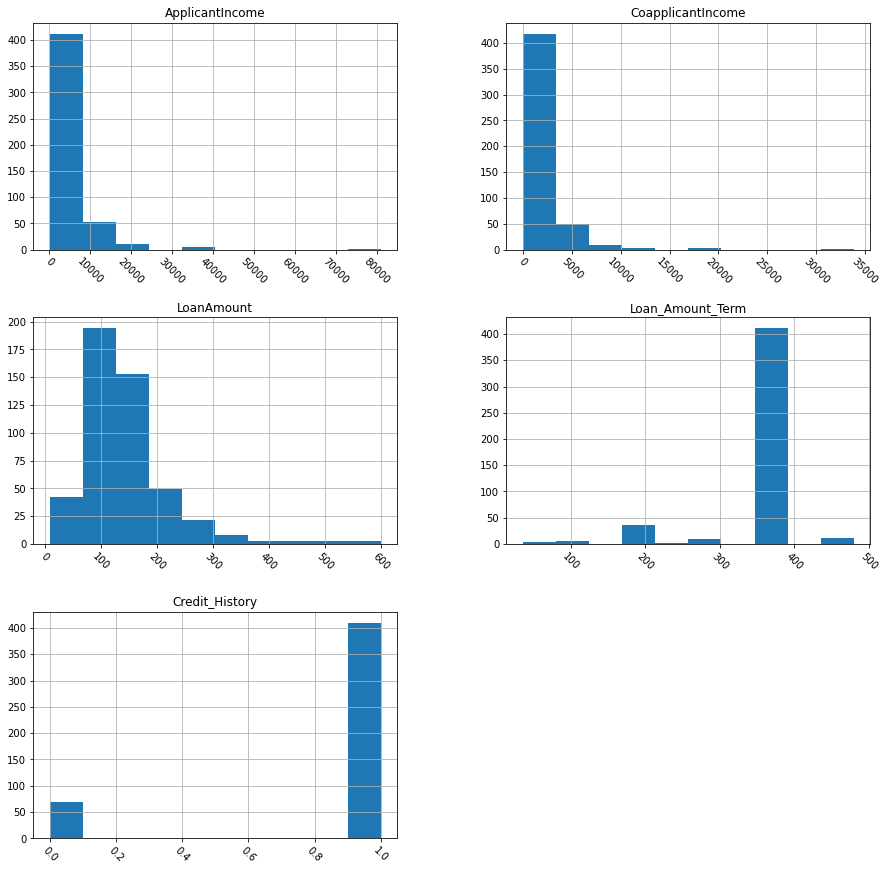

In [278]:
data.hist(xrot=-45, figsize=(15,15))
plt.show()

### 5.2  Multivariate Plots

Side-by-Side Bar Graphs, Correlation Matrix plot and HeatMap

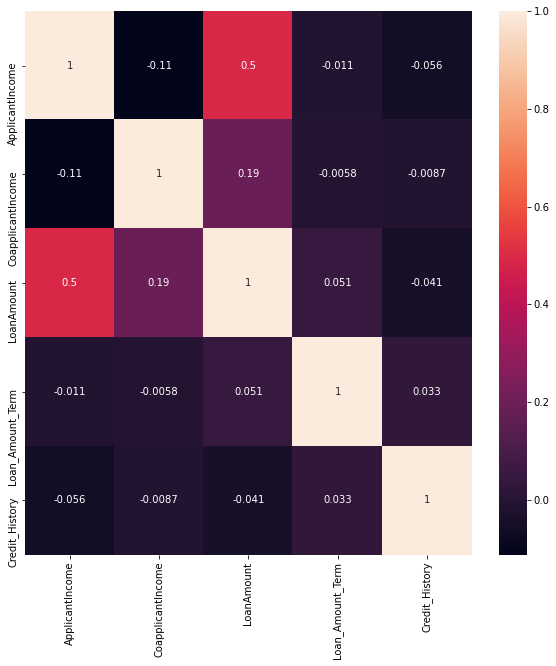

In [279]:
plt.figure(figsize=(10,10))
correlation = data.corr().round(4)
sb.heatmap(data=correlation, annot=True)
plt.show()

In [280]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-1.13e-01,0.50,-1.08e-02,-5.62e-02
CoapplicantIncome,-0.11,1.00e+00,0.19,-5.77e-03,-8.69e-03
LoanAmount,0.50,1.91e-01,1.00,5.09e-02,-4.08e-02
Loan_Amount_Term,-0.01,-5.77e-03,0.05,1.00e+00,3.29e-02
Credit_History,-0.06,-8.69e-03,-0.04,3.29e-02,1.00e+00


Independent variables are not correlated.

<AxesSubplot:xlabel='Education', ylabel='count'>

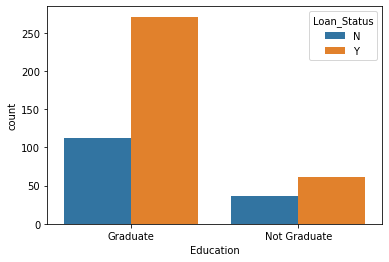

In [281]:
#Checking correlations between Education and Loan_Status variables
sb.countplot(x ='Education', hue ='Loan_Status', data=data)

It appears there is a strong association between the two variables. Graduates are more likely to get their loans approved than nongraduates.

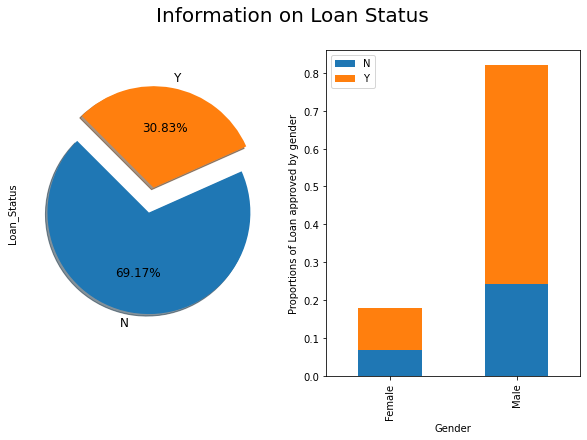

In [282]:
#Percentage of approved loans by Level of education
labels=["N", "Y"]
fig, ax = plt.subplots(1,2, figsize=(10,6))

#Generate the Pie Chart
data["Loan_Status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                           labels=labels, fontsize=12, startangle=135)
plt.suptitle('Information on Loan Status', fontsize=20)

pict1=data.groupby(['Gender', 'Loan_Status']).size().groupby(level=0).apply(lambda x :x/data.shape[0]).unstack().plot(kind='bar', ax=ax[1], stacked=True)
                                                                                                                                                                                                                       
#generate the bar chart on the left
ax[1].set(ylabel="Proportions of Loan approved by gender")
ax[1].set(xlabel="Gender")
ax[1].legend(["N", "Y"])
plt.show()

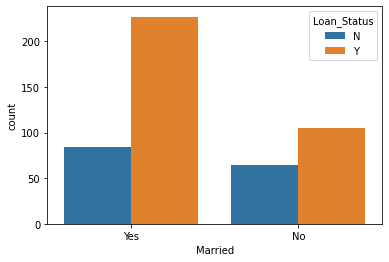

In [283]:
#Checking correlations between Education and Marrital_Status variables
sb.countplot(x='Married', hue='Loan_Status', data=data)
plt.show()

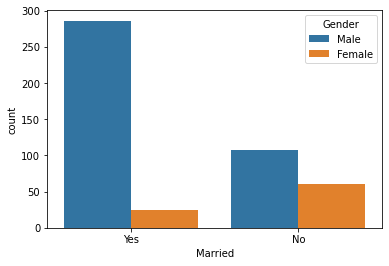

In [284]:
#Checking correlations between Education and Marrital_Status variables
sb.countplot(x='Married', hue='Gender', data=data)
plt.show()

It appears there is a strong association between the two variables. Married are more likely to get their loans approved than unmarried.

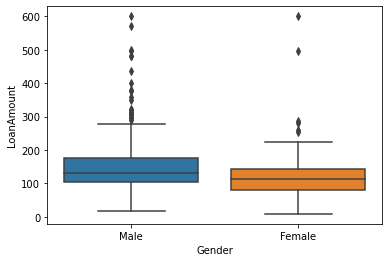

In [285]:
sb.boxplot(x='Gender', y='LoanAmount', data=data)
plt.show()

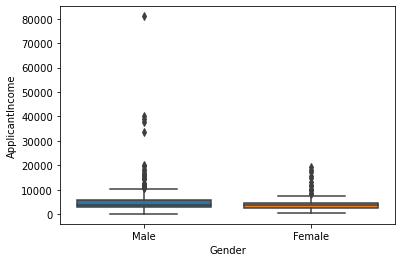

In [286]:
sb.boxplot(x='Gender', y='ApplicantIncome', data=data)
plt.show()

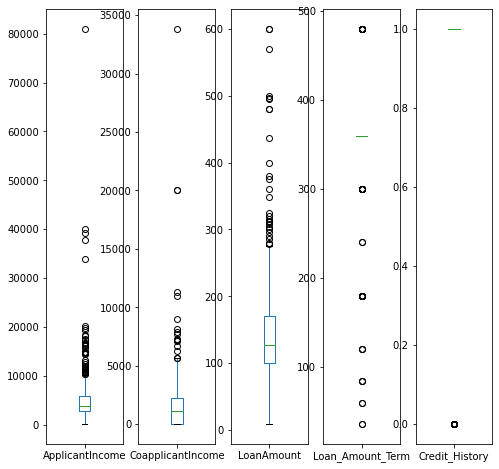

In [287]:
# This will helpcomparing the five number summaries of the variables.
data.plot(kind='box', subplots=True, sharex=True, figsize=(8,8))
plt.show()

### 5.3 Encoding the categorical data into Quantitative data

Converting all categorical variables to quantitative variables

In [288]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [289]:
#replacing 3+ by 4
data=data.replace({'Dependents':{'3+':4}})
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [290]:
data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [291]:
#label encoding. We will convert all categorical variables to quantitative variables. EX:1=yes, 0=NO.
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0,'Yes':1},'Property_Area':
             {'Rural':0,'Semiurban':1,'Urban':2}, 'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [292]:
#label encoding. This replaces categories with numbers. EX:1=yes, 0=NO.
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [293]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# 6. FEATURE ENGENIERING

### 6.1 Creating Dependent And Independent Variables

In [294]:
#We need to separate data and label. We could also use the following codes:
#X = data.iloc[1:542,1:12]
#y = data.iloc[1:542,12]
X = data.drop(columns={'Loan_ID','Loan_Status'}, axis=1) #axis=1 for removing columns and axis=1 for rows
y = data['Loan_Status']
print(X)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [295]:
# For each X, calculate VIF(variable inflation factor) to measure the amount of multicollinearity and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values.astype(int), i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head(6)

,VIF Factor,features
0,6.03,Gender
1,3.68,Married
2,1.79,Dependents
3,5.15,Education
4,1.19,Self_Employed
5,2.76,ApplicantIncome


The variable Gender seems to be highly correlated to the variable Married. we will proceed anyways.

### 6.2 Split Dataset to Train and Test

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, stratify=y, random_state=2)

In [297]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


# 7. Building Models

### 7.1 Support Vector Machine Model 

7.1.1 Building the SVM model on the Train Dataset

In [298]:
#Training the model using the support vector machine model
#svr= SVC(kernel='linear')
svr = SVC(C=100000)

In [299]:
svr.fit(X_train, y_train) #this will train the model

SVC(C=100000)

7.1.2 Applying the Trained Model on the Train Dataset to Predict Values

In [300]:
#accuracy score on training data
X_train_prediction = svr.predict(X_train)

In [301]:
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [302]:
print("accuracy on training data:",training_data_accuracy)

accuracy on training data: 0.7268518518518519


7.1.3 Applying the Trained Model on the Test Dataset to Predict Values

In [303]:
#accuracy score on test data
X_testing_prediction = svr.predict(X_test)

In [304]:
testing_data_accuracy=accuracy_score(X_testing_prediction,y_test)

In [305]:
print("accuracy on testing data:",testing_data_accuracy)

accuracy on testing data: 0.6875


In [306]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, prediction):
    mae = mean_absolute_error(y, prediction)
    mse = mean_squared_error(y, prediction)
    rmse = np.sqrt(mean_squared_error(y, prediction))
    r_squared = r2_score(y, prediction)
    return mae, mse, rmse, r_squared


In [307]:
models = pd.DataFrame(columns=["Models","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [308]:
#svr = SVC(C=100000)
#svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Models": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.3125
MSE: 0.3125
RMSE: 0.5590169943749475
R2 Score: -0.4545454545454546
------------------------------
RMSE Cross-Validation: 0.5662910374726138


Training Accuracy    : 72.69 %
Model Accuracy Score : 68.75 %
--------------------------------------------------------


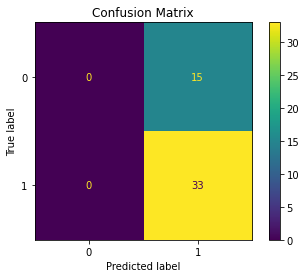

In [309]:
# Support Vector Machine
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
#y_pred_svr = (y_pred_svr > 0.5)


svr_train = round(svr.score(X_train, y_train) * 100, 2)
svr_accuracy = round(accuracy_score(y_pred_svr, y_test) * 100, 2)

print("Training Accuracy    :",svr_train ,"%")
print("Model Accuracy Score :",svr_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svr, X_test, y_test);
plt.title('Confusion Matrix');

7.1.4 Using the Model for Prediction

In [310]:
#Input data as a numpy array
Input_data =  (1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2)
#changing to numpy array
Input_data = np.asarray(Input_data)
#reshape the array as we are predicting for one instance
std_data=Input_data.reshape(1,-1)
#Standardize the input data
#std_data = scaler.transform(Input_data)
print(std_data)
prediction =svr.predict(std_data)
print(prediction)

if (prediction[0] ==0):
    print('CONCLUSION: The person is not Granted the Loan')
else:
    print('CONCLUSION: The person is Granted the Loan')
    

[[1.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00 7.583e+03 0.000e+00
  1.870e+02 3.600e+02 1.000e+00 2.000e+00]]
[1]
CONCLUSION: The person is Granted the Loan


### 7.2 Random Forest Regressor

In [311]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Models": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.27187500000000003
MSE: 0.14937708333333335
RMSE: 0.38649331602672427
R2 Score: 0.30471757575757563
------------------------------
RMSE Cross-Validation: 0.4008082023608696


In [312]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
y_pred_rf = (y_pred_rf > 0.5)


ran_for_train = round(random_forest.score(X_train, y_train) * 100, 2)
ran_for_accuracy = round(accuracy_score(y_pred_rf, y_test, normalize=True) * 100, 2)

print("Training Accuracy    :",ran_for_train ,"%")
print("Model Accuracy Score :",ran_for_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
#plot_confusion_matrix(random_forest, X_test, y_test);
#plt.title('Confusion Matrix');


Training Accuracy    : 89.09 %
Model Accuracy Score : 79.17 %
--------------------------------------------------------


### 7.3 Model Comparison

In [313]:
models.sort_values(by="RMSE (Cross-Validation)")

,Models,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
1,RandomForestRegressor,0.27,0.15,0.39,0.30,0.40
0,SVR,0.31,0.31,0.56,-0.45,0.57


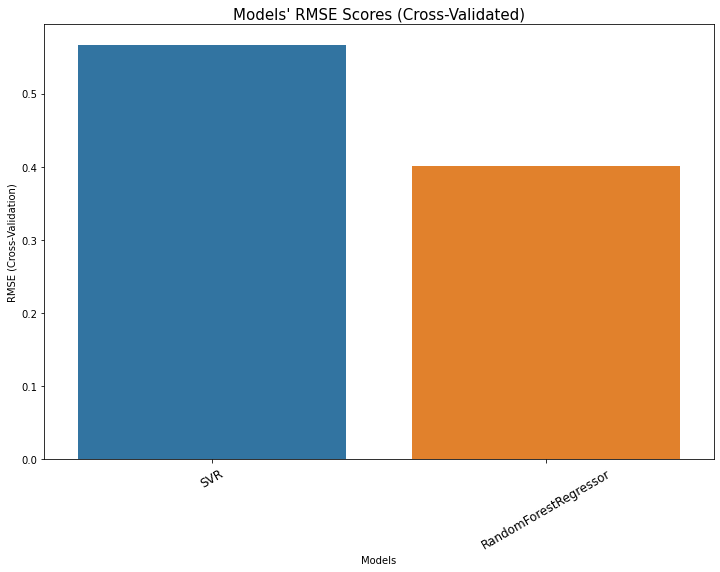

In [314]:
plt.figure(figsize=(12,8))
sb.barplot(x=models["Models"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

CONCLUSION

The Support Vector Machine Model performs worst than the Random Forest Regressor, which seems to perform well.

# 8. OTHER MACHINE LEARNING MODELS 

### 8.1 Logistic Regression

Training Accuracy    : 80.09 %
Model Accuracy Score : 83.33 %
--------------------------------------------------------


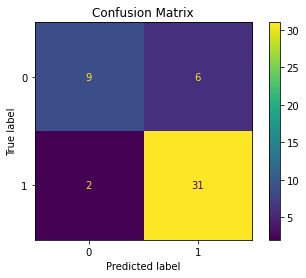

In [315]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()  
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

### 8.2 Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 72.92 %
--------------------------------------------------------
[[ 6  9]
 [ 4 29]]


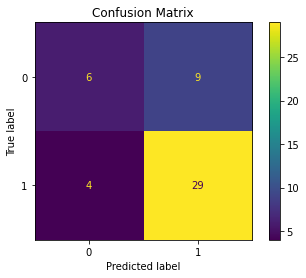

In [316]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');
print(confusion_matrix(y_test,y_pred_dec))

### 8.3 KNeighbors Classifier

Training Accuracy    : 74.31 %
Model Accuracy Score : 66.67 %
--------------------------------------------------------


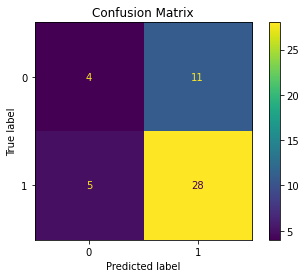

In [317]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(knn, X_test, y_test);
plt.title('Confusion Matrix');

### 8.4 AdaBoost Classifier

Training Accuracy    : 86.11 %
Model Accuracy Score : 83.33 %
--------------------------------------------------------


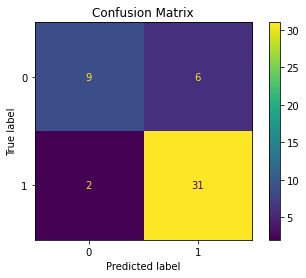

In [318]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(ada, X_test, y_test);
plt.title('Confusion Matrix');

### 8.5 GradientBoosting Classifier

Training Accuracy    : 90.51 %
Model Accuracy Score : 83.33 %
--------------------------------------------------------


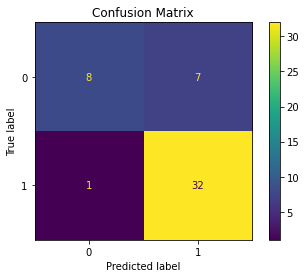

In [319]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)


gbc_train = round(gbc.score(X_train, y_train) * 100, 2)
gbc_accuracy = round(accuracy_score(y_pred_gbc, y_test) * 100, 2)

print("Training Accuracy    :",gbc_train ,"%")
print("Model Accuracy Score :",gbc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(gbc, X_test, y_test);
plt.title('Confusion Matrix');

### 8.6 Bagging Classifier

Training Accuracy    : 98.84 %
Model Accuracy Score : 68.75 %
--------------------------------------------------------


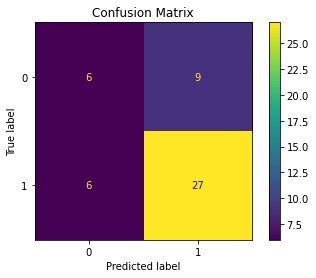

In [320]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier()
Bag.fit(X_train,y_train)
y_pred_Bag = Bag.predict(X_test)


Bag_train = round(Bag.score(X_train, y_train) * 100, 2)
Bag_accuracy = round(accuracy_score(y_pred_Bag, y_test) * 100, 2)

print("Training Accuracy    :",Bag_train ,"%")
print("Model Accuracy Score :",Bag_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(Bag, X_test, y_test);
plt.title('Confusion Matrix');

### 8.7 Model Comparison

In [321]:
Models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Decision Tree','KNN', 'AdaBoostClassifier', 'GradientBoostingClassifier',
        'BaggingClassifier','Suport Vector Machine','RandomForestRegressor'
        
    ],
    
    'Model Accuracy Score': [
        log_accuracy, decision_accuracy, knn_accuracy,ada_accuracy,gbc_accuracy, 
       Bag_accuracy, svr_accuracy, ran_for_accuracy
    ]
})


In [322]:
pd.set_option('precision',2)

Models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Model Accuracy Score
Logistic Regression,83.33
AdaBoostClassifier,83.33
GradientBoostingClassifier,83.33
RandomForestRegressor,79.17
Decision Tree,72.92
BaggingClassifier,68.75
Suport Vector Machine,68.75
KNN,66.67


CONCLUSION: Most of these models perform well, especially Logistic Regression, AdaBoostClassifier and Random Forest Regressor.